This dataset describes land parcels in the City of Denver. The question to be answered is how do different variables in the dataset influence the total parcel value? 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
df=pd.read_csv('parcels.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,32,52,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(df.head(20))

          PIN     SCHEDNUM MAPNUM BLKNUM PARCELNUM APPENDAGE PARCEL_SOURCE  \
0   160820474  2.26543e+11   2265     43         4         0                 
1   160785474  2.25247e+11   2252     47        15         0       Sanborn   
2   160971316  2.35112e+11   2351     12         5         0                 
3   161253047  5.10406e+11   5104      6        13         0       Sanborn   
4   160791768  2.25342e+11   2253     42        16         0                 
5   164176721  5.04413e+11   5044     13       103         0          None   
6   160819441  2.26528e+11   2265     28        14         0       Sanborn   
7   163177568  6.07105e+11   6071      5        17         0                 
8   161204755  5.08333e+11   5083     33         8         0       Sanborn   
9   161744903  6.05441e+11   6054     41         1         0                 
10  162405074  2.18407e+11   2184      7        47         0       Sanborn   
11  160781509  2.25214e+11   2252     14         9         0    

In [3]:
#Check for null values
df.isna().sum()

PIN                         0
SCHEDNUM                    0
MAPNUM                      0
BLKNUM                      0
PARCELNUM                   0
APPENDAGE                   0
PARCEL_SOURCE               0
SYSTEM_START_DATE           0
OWNER_NAME                  0
OWNER_ADDRESS_LINE1         0
OWNER_ADDRESS_LINE2         0
OWNER_ADDR_NBR_PREFIX       0
OWNER_ADDR_NBR              0
OWNER_ADDR_NBR_SUFFIX       0
OWNER_STR_NAME_PRE_MOD      0
OWNER_STR_NAME_PRE_DIR      0
OWNER_STR_NAME_PRE_TYPE     0
OWNER_STR_NAME              0
OWNER_STR_NAME_POST_TYPE    0
OWNER_STR_NAME_POST_DIR     0
OWNER_STR_NAME_POST_MOD     0
OWNER_UNIT_TYPE             0
OWNER_UNIT_IDENT            0
OWNER_CITY                  0
OWNER_STATE                 0
OWNER_ZIP                   0
SITUS_ADDRESS_ID            0
SITUS_ADDRESS_LINE1         0
SITUS_ADDRESS_LINE2         0
SITUS_CITY                  0
                           ..
SITUS_ZIP                   0
SITUS_ADDR_NBR              0
SITUS_ADDR

# Exploring the Data
Below are basic questions followed by the code used to answer the questions.

## How many variables do I have?
There are a total of 61 variables (columns) in the data set. 

## How many datapoints?
There are 231,905 data points and 231,885 unique data points

## Which variables are continuous (having an infinite number of possible values, such as age) and which are categorical (having a limited number of values, such as gender).
Since there are 61 variables in this data set, I am going to select a subset of the variables. The outcome variable will be Total Value (TOTAL_VALUE). This variable is continuous. The other variables evaluated are Sale Price 'SALE_PRICE'(continuous), zip code the parcel is in 'SITUS_ZIP' (categorical), home type 'D_CLASS_CN' (categorical), Sale year 'SALE_YEAR'(categorical), and zone 'ACT_ZONE'(categorical).


## Do I have missing data? If so, how much?
386 values are missing from the Type 2 column, presumably because there simply is no measurement of it for those Pokemons.

## How much variance is there in each of my variables?
This is described in the one of the results for this section

In [4]:
list(df)

['PIN',
 'SCHEDNUM',
 'MAPNUM',
 'BLKNUM',
 'PARCELNUM',
 'APPENDAGE',
 'PARCEL_SOURCE',
 'SYSTEM_START_DATE',
 'OWNER_NAME',
 'OWNER_ADDRESS_LINE1',
 'OWNER_ADDRESS_LINE2',
 'OWNER_ADDR_NBR_PREFIX',
 'OWNER_ADDR_NBR',
 'OWNER_ADDR_NBR_SUFFIX',
 'OWNER_STR_NAME_PRE_MOD',
 'OWNER_STR_NAME_PRE_DIR',
 'OWNER_STR_NAME_PRE_TYPE',
 'OWNER_STR_NAME',
 'OWNER_STR_NAME_POST_TYPE',
 'OWNER_STR_NAME_POST_DIR',
 'OWNER_STR_NAME_POST_MOD',
 'OWNER_UNIT_TYPE',
 'OWNER_UNIT_IDENT',
 'OWNER_CITY',
 'OWNER_STATE',
 'OWNER_ZIP',
 'SITUS_ADDRESS_ID',
 'SITUS_ADDRESS_LINE1',
 'SITUS_ADDRESS_LINE2',
 'SITUS_CITY',
 'SITUS_STATE',
 'SITUS_ZIP',
 'SITUS_ADDR_NBR',
 'SITUS_ADDR_NBR_SUFFIX',
 'SITUS_STR_NAME_PRE_MOD',
 'SITUS_STR_NAME_PRE_DIR',
 'SITUS_STR_NAME_PRE_TYPE',
 'SITUS_STR_NAME',
 'SITUS_STR_NAME_POST_TYPE',
 'SITUS_STR_NAME_POST_DIR',
 'SITUS_STR_NAME_POST_MOD',
 'SITUS_UNIT_TYPE',
 'SITUS_UNIT_IDENT',
 'TAX_DIST',
 'LAND_VALUE',
 'IMPROVEMENT_VALUE',
 'IMPROVEMENTS',
 'PROP_CLASS',
 'TOTAL_VALUE',

In [5]:
# Count how many variables I have
print(len(list(df)))

61


In [6]:
#Count number of data points
print(df.count())
#Count number of unique data points (PIN is the identifier for each separate parcel)
print(df.PIN.nunique())

PIN                         231905
SCHEDNUM                    231905
MAPNUM                      231905
BLKNUM                      231905
PARCELNUM                   231905
APPENDAGE                   231905
PARCEL_SOURCE               231905
SYSTEM_START_DATE           231905
OWNER_NAME                  231905
OWNER_ADDRESS_LINE1         231905
OWNER_ADDRESS_LINE2         231905
OWNER_ADDR_NBR_PREFIX       231905
OWNER_ADDR_NBR              231905
OWNER_ADDR_NBR_SUFFIX       231905
OWNER_STR_NAME_PRE_MOD      231905
OWNER_STR_NAME_PRE_DIR      231905
OWNER_STR_NAME_PRE_TYPE     231905
OWNER_STR_NAME              231905
OWNER_STR_NAME_POST_TYPE    231905
OWNER_STR_NAME_POST_DIR     231905
OWNER_STR_NAME_POST_MOD     231905
OWNER_UNIT_TYPE             231905
OWNER_UNIT_IDENT            231905
OWNER_CITY                  231905
OWNER_STATE                 231905
OWNER_ZIP                   231905
SITUS_ADDRESS_ID            231905
SITUS_ADDRESS_LINE1         231905
SITUS_ADDRESS_LINE2 

In [7]:
#drop duplicate rows
df.drop_duplicates(subset='PIN', keep='first', inplace=True)

In [112]:
#create data frames with varaibles we want
df2 = df.loc[:,['TOTAL_VALUE', 'SALE_PRICE', 'IMP_AREA','SITUS_ZIP', 'D_CLASS_CN', 'SALE_YEAR', 'ACT_ZONE']]
print(df2.head(20))

   TOTAL_VALUE SALE_PRICE IMP_AREA   SITUS_ZIP     D_CLASS_CN SALE_YEAR  \
0       691700     347000     2032  80205-4447  SINGLE FAMILY      2005   
1       463000       None     1253  80205-4154  SINGLE FAMILY      2005   
2       530900     341000     1791  80205-5524  SINGLE FAMILY      2011   
3       550500     260000     1637  80203-4002  SINGLE FAMILY      2012   
4       458800     150000     1378  80205-4742  SINGLE FAMILY      2007   
5       463700       None     1691        None       ROWHOUSE      None   
6       773000     153000     1998  80205-4510  SINGLE FAMILY      2012   
7      2029500    1760000     5472  80220-5173  SINGLE FAMILY      2003   
8       190600       None     1158  80219-1514  SINGLE FAMILY      1990   
9       418500     400000      931  80220-5510  SINGLE FAMILY      2016   
10      408500     250675     1031  80212-2609  SINGLE FAMILY      2009   
11      335700     185000     1599  80205-3627  SINGLE FAMILY      2009   
12      612900       None

In [113]:
#remove rows where column = None
df2=df2[df2['TOTAL_VALUE']!='None']
df2=df2[df2['SALE_PRICE']!='None']
df2=df2[df2['SITUS_ZIP']!='None']
df2=df2[df2['IMP_AREA']!='None']
df2=df2[df2['D_CLASS_CN']!='None']
df2=df2[df2['SALE_YEAR']!='None']
df2=df2[df2['ACT_ZONE']!='None']

In [114]:
#Get new length of data
len(df2)

139692

In [115]:
#Look at data types
df2.dtypes

TOTAL_VALUE    object
SALE_PRICE     object
IMP_AREA       object
SITUS_ZIP      object
D_CLASS_CN     object
SALE_YEAR      object
ACT_ZONE       object
dtype: object

In [118]:
#Convert total value to integet
df2['TOTAL_VALUE']=df2['TOTAL_VALUE'].astype(int)
#convert Sale Price to integer
df2['SALE_PRICE']=df2['SALE_PRICE'].astype(int)
#convert Zip Code to string
df2['SITUS_ZIP']=df2['SITUS_ZIP'].astype(str)
#Convert home type to text
df2['D_CLASS_CN']=df2['D_CLASS_CN'].astype(str)
#Convert improvement area to integer
df2['IMP_AREA']=df2['IMP_AREA'].astype(int)
#Convert Sale year to integer
df2['SALE_YEAR']=df2['SALE_YEAR'].astype(int)
#Convert zone to text
df2['ACT_ZONE']=df2['ACT_ZONE'].astype(str)

In [119]:
#Check new data types
df2.dtypes

TOTAL_VALUE     int64
SALE_PRICE      int64
IMP_AREA        int64
SITUS_ZIP      object
D_CLASS_CN     object
SALE_YEAR       int64
ACT_ZONE       object
dtype: object

Text(0, 0.5, 'Sale Price')

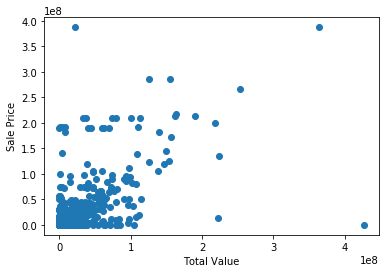

In [120]:
#Show relationship between continuous variables
plt.scatter(df2.TOTAL_VALUE, df2.SALE_PRICE)
plt.xlabel('Total Value')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Improvement Area')

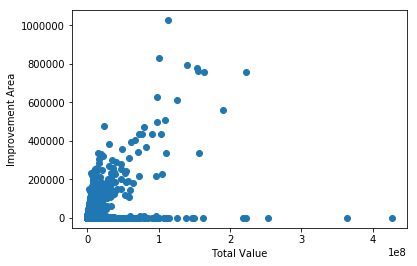

In [121]:
plt.scatter(df2.TOTAL_VALUE, df2.IMP_AREA)
plt.xlabel('Total Value')
plt.ylabel('Improvement Area')

Text(0, 0.5, 'Improvement Area')

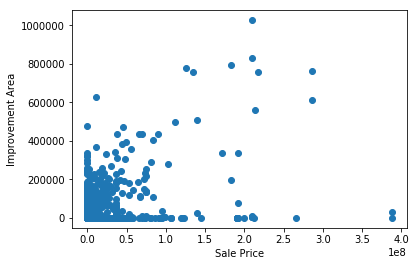

In [122]:
plt.scatter(df2.SALE_PRICE, df2.IMP_AREA)
plt.xlabel('Sale Price')
plt.ylabel('Improvement Area')

In [54]:
#Describe the continuous variables

df2.TOTAL_VALUE.describe()

count    1.396920e+05
mean     5.902287e+05
std      3.241627e+06
min      1.000000e+02
25%      2.508000e+05
50%      3.561000e+05
75%      5.188250e+05
max      4.266992e+08
Name: TOTAL_VALUE, dtype: float64

In [55]:
df2.SALE_PRICE.describe()

count    1.396920e+05
mean     4.250043e+05
std      3.901409e+06
min      1.000000e+00
25%      7.600000e+04
50%      1.900000e+05
75%      3.450000e+05
max      3.875000e+08
Name: SALE_PRICE, dtype: float64

In [123]:
df2.IMP_AREA.describe()

count    1.396920e+05
mean     2.040371e+03
std      1.055476e+04
min      0.000000e+00
25%      9.140000e+02
50%      1.202000e+03
75%      1.748000e+03
max      1.026931e+06
Name: IMP_AREA, dtype: float64

In [124]:
#Create correlation matrix between total value, sale price, sale year, and year built
corrmat = df2.corr()
print(corrmat)

             TOTAL_VALUE  SALE_PRICE  IMP_AREA  SALE_YEAR
TOTAL_VALUE     1.000000    0.667228  0.497451   0.015818
SALE_PRICE      0.667228    1.000000  0.447241   0.031592
IMP_AREA        0.497451    0.447241  1.000000   0.002012
SALE_YEAR       0.015818    0.031592  0.002012   1.000000


# Creating Features
We want to figure out how to plot out the categorical data. The first step is to explore the categorical data and figure out how to pair down and bucket the number of unique values.

In [56]:
#look at the number of zip codes
len(df2.SITUS_ZIP.unique())

30956

In [180]:
#pare down the number by getting only first five digits of zip code
df2['SITUS_ZIP'] = df['SITUS_ZIP'].str[:5]
print(df2.SITUS_ZIP.nunique())
df2.SITUS_ZIP.value_counts()

45


80219    10255
80210     9313
80220     8451
80211     8283
80249     6949
80209     6440
80205     6421
80239     6141
80238     5901
80206     5281
80204     4934
80207     4878
80218     4626
80202     4537
80212     4297
80237     4277
80203     4146
80222     4082
80231     3998
80223     3904
80247     3630
80224     3552
80123     3464
80236     2723
80216     2091
80230     1955
80227     1550
80221     1345
80246     1158
80235      958
80226       47
80214       46
80232       21
CO 80        8
80014        7
80012        7
CO           4
80293        3
80264        2
80022        2
80033        1
80265        1
80274        1
80294        1
80290        1
Name: SITUS_ZIP, dtype: int64

In [59]:
#Lets look at the next variable: zoning codes
print(df2.ACT_ZONE.nunique())
df2.ACT_ZONE.value_counts()

158


E-SU-DX         15826
S-SU-D          13540
U-SU-C          10612
R-2-A            8826
R-2              5514
S-SU-F           4984
R-MU-20          4935
PUD              4431
U-SU-B           4015
U-SU-B1          3884
R-1              3537
G-MU-3           3381
G-MU-5           3114
U-TU-C           2798
U-RH-2.5         2665
C-MU-20          2430
E-SU-D1X         2140
O-1              1984
E-SU-D           1795
U-TU-B           1758
D-TD             1670
E-TU-C           1580
U-SU-C1          1533
G-RH-3           1297
M-RX-5           1202
U-RH-3A          1159
U-SU-A1          1089
E-SU-B           1066
E-SU-G           1039
C-MX-5            993
                ...  
T-MU-30             9
OS-A                9
C-RX-5              8
CMP-EI2             8
C-CCN-8             8
I-0                 7
S-MX-8              7
M-IMX-5             6
R-3-X               6
R-4-X               5
OS-B                4
E-MS-2X             4
C-MX-20             4
U-RX-5              4
C-MS-12   

In [197]:
#Classify the different zoning codes

ZONING_DISTRICT = []

for index,row in df2.iterrows():
    if row['ACT_ZONE'].startswith('S'):
        ZONING_DISTRICT.append('Suburban')
    elif row['ACT_ZONE'].startswith('E'):
        ZONING_DISTRICT.append('Urban Edge')
    elif row['ACT_ZONE'].startswith('U'):
        ZONING_DISTRICT.append('Urban')
    elif row['ACT_ZONE'].startswith('G'):
        ZONING_DISTRICT.append('General Urban')
    elif row['ACT_ZONE'].startswith('C'):
        ZONING_DISTRICT.append('Urban Center')
    elif row['ACT_ZONE'].startswith('D'):
        ZONING_DISTRICT.append('Downtown')
    elif row['ACT_ZONE'].startswith('I'):
        ZONING_DISTRICT.append('Industrial')
    elif row['ACT_ZONE'].startswith('CMP'):
        ZONING_DISTRICT.append('Campus')
    elif row['ACT_ZONE'].startswith('OS'):
        ZONING_DISTRICT.append('Open Space')
    elif row['ACT_ZONE'].startswith('M'):
        ZONING_DISTRICT.append('Master Planned')
    elif row['ACT_ZONE'].startswith('UO'):
        ZONING_DISTRICT.append('Use Overlay District')
    elif row['ACT_ZONE'].startswith('CO'):
        ZONING_DISTRICT.append('Conservation Overlay District')
    elif row['ACT_ZONE'].startswith('DO'):
        ZONING_DISTRICT.append('Design Overlay District')
    elif row['ACT_ZONE'].startswith('IO'):
        ZONING_DISTRICT.append('Incentive Overlay District')
    elif row['ACT_ZONE'].startswith('AIO'):
        ZONING_DISTRICT.append('Airport Influence Overlay District')
    elif row['ACT_ZONE'].startswith('PUD'):
        ZONING_DISTRICT.append('Planned Unit Development')
    elif row['ACT_ZONE'].startswith('DIA'):
        ZONING_DISTRICT.append('Denver International Airport')
    elif row['ACT_ZONE'].startswith('O-1'):
        ZONING_DISTRICT.append('Open Zone District')
    elif row['ACT_ZONE'].startswith('R'):
        ZONING_DISTRICT.append('Residential')
    else:
        ZONING_DISTRICT.append('Other')
        
df2['ZONING_DISTRICT']= ZONING_DISTRICT

In [23]:
df2.NEIGHBORHOOD.head(20)
print(df2.NEIGHBORHOOD.nunique())

13


In [27]:
#Lets look at the number of sale years we have

print(df2.SALE_YEAR.nunique())

45


In [179]:
#Bucket that into five year increments
df2['SALE_YEAR_RANGE'] = pd.cut(df2['SALE_YEAR'], 9)

print(df2.SALE_YEAR_RANGE)

0         (2004.222, 2010.111]
2           (2010.111, 2016.0]
3           (2010.111, 2016.0]
4         (2004.222, 2010.111]
6           (2010.111, 2016.0]
7         (1998.333, 2004.222]
9           (2010.111, 2016.0]
10        (2004.222, 2010.111]
11        (2004.222, 2010.111]
13        (1998.333, 2004.222]
15          (2010.111, 2016.0]
16        (2004.222, 2010.111]
17          (2010.111, 2016.0]
18        (1998.333, 2004.222]
21          (2010.111, 2016.0]
23        (2004.222, 2010.111]
26          (2010.111, 2016.0]
27          (2010.111, 2016.0]
32          (2010.111, 2016.0]
33        (2004.222, 2010.111]
34          (2010.111, 2016.0]
35          (2010.111, 2016.0]
36          (2010.111, 2016.0]
37          (2010.111, 2016.0]
39          (2010.111, 2016.0]
41          (2010.111, 2016.0]
42        (1992.444, 1998.333]
43          (2010.111, 2016.0]
45          (2010.111, 2016.0]
47        (2004.222, 2010.111]
                  ...         
231794    (1998.333, 2004.222]
231797  

In [72]:
#Now we have nine year ranges instead of 45 different years.
df2.SALE_YEAR_RANGE.nunique()

9

In [64]:
#Let's look at the structure type variable
df2.D_CLASS_CN.unique()

array(['SINGLE FAMILY', 'RESTAURANT', 'ROWHOUSE', 'APT W/2 UNITS',
       'CONDOMINIUM', 'APT W/6 UNITS', 'WAREHOUSE', 'OFFICE CONVRSN',
       'APT LOW-RISE>9UNT, WALK-UP', 'APT W/3 UNITS', 'OFFICE CONDO',
       'OFFICE W/RESID', 'RETAIL, SINGLE', '101 CONDO PKG', 'OFFICE BLDG',
       'RETAIL CONVRSN', 'APT W/4 UNITS', 'CARWASH SMALL-COIN OPER',
       'MANUFACTURING', 'SCHOOL', 'RETAIL, MULTI', 'VCNT LAND',
       'PBG MID-RISE, EL, 1-9 STY', 'MISC IMPS-TIE BACK', 'MINI-STORAGE',
       'MISC. SITE IMPROVEMENTS', 'MISC ROWHOUSE IMPS', 'REST. CONDO',
       'HOTEL-SMALL OVER 1ST FLR COMM', 'VCNT LAND R-X ZONE',
       '10S CONDO STORAGE', 'VCNT LAND - RES RATIO', 'GAS STATION',
       'DCL MISC RES IMPS', 'APT HIGH-RISE>9 UNT,10+ST',
       'PBG LOW-RISE, WALK-UP', 'APT W/5 UNITS', 'RETAIL CONDO',
       'GROUP/BOARDING HOME-1 KIT', 'CONV. RETAIL', 'AUTO SERVICE',
       'RETAIL W/RESID', 'MEDICAL BLDG', 'CHURCH BUILT AS CHURCH',
       'SPECIAL PURPOSE', 'FOOD PROCESS', 'REST. W/RE

In [63]:
len(df2.D_CLASS_CN.unique())

123

It looks like we have a lot of different naming types for structures, so since we already have the zoning type
to use as a feature, let's leave that data as descriptive since classifying each different structure type will be
too time consuming

In [198]:
#So now we have three categorical variables to turn into features: range of year sold, zoning district, and zip code
#First, let's use the one hot method to turn these three variables into features

# Create dummies and create a data frames to hold our features.
features = pd.get_dummies(df2['ZONING_DISTRICT'])
features2 = pd.get_dummies(df2['SITUS_ZIP'])
features3 = pd.get_dummies(df2['SALE_YEAR_RANGE'])


In [106]:
#bin the zones into zoning contexts
features['Suburban, Urban Edge and Urban Neighborhood'] = np.where((df2['ZONING_DISTRICT'].isin(['Suburban', 'Urban Edge','Urban'])), 1, 0)
features['General Urban, Urban Center and Downtown Neighborhood'] = np.where(df2['ZONING_DISTRICT'].isin(['General Urban', 'Urban Center','Downtown']), 1, 0)
features['Special Contexts and Zone Districts'] = np.where(df2['ZONING_DISTRICT'].isin(
    ['Campus',
   'Open Space',
   'Master Planned',
    'Use Overlay District',
    'Conservation Overlay District',
   'Design Overlay District',
   'Incentive Overlay District',
   'Airport Influence Overlay District',
    'Planned Unit Development',
    'Denver International Airport',
   'Open Zone District',
    'Residential',
    'Other']), 1, 0)



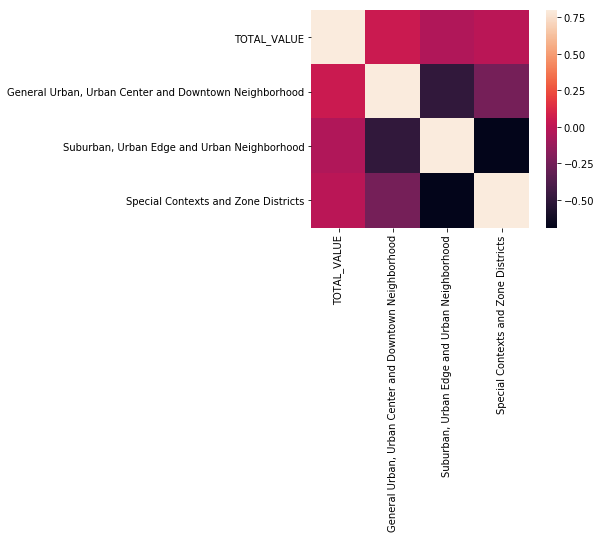

                                                    TOTAL_VALUE  \
TOTAL_VALUE                                            1.000000   
General Urban, Urban Center and Downtown Neighb...     0.051526   
Suburban, Urban Edge and Urban Neighborhood           -0.039819   
Special Contexts and Zone Districts                   -0.006612   

                                                    General Urban, Urban Center and Downtown Neighborhood  \
TOTAL_VALUE                                                                                  0.051526       
General Urban, Urban Center and Downtown Neighb...                                           1.000000       
Suburban, Urban Edge and Urban Neighborhood                                                 -0.494248       
Special Contexts and Zone Districts                                                         -0.244828       

                                                    Suburban, Urban Edge and Urban Neighborhood  \
TOTAL_VALUE        

In [190]:
plotdf = df2.loc[:, ['TOTAL_VALUE']]
plotdf['General Urban, Urban Center and Downtown Neighborhood'] = features['General Urban, Urban Center and Downtown Neighborhood'] 
plotdf['Suburban, Urban Edge and Urban Neighborhood'] = features['Suburban, Urban Edge and Urban Neighborhood'] 
plotdf['Special Contexts and Zone Districts'] = features['Special Contexts and Zone Districts']
corrmat2 = plotdf.corr()
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.show()
print(corrmat2)

#From the above correlation analysis we can see that Suburban, Urban Edge and Urban Neighborhood and Special Contexts and Zone Districts have a slightly negative impact on total land value while General Urban, Urban Center, and Downtown Neighborhoods have a slightly positive impact on total value. However, none of these correlations are very strong

In [194]:
#Lets try again with less broad categories
plotdf = features
plotdf['TOTAL_VALUE'] = df2.TOTAL_VALUE
corrmat3 = plotdf.corr()
print(corrmat3)

                                                    Downtown  General Urban  \
Downtown                                            1.000000      -0.048713   
General Urban                                      -0.048713       1.000000   
Industrial                                         -0.020272      -0.035701   
Master Planned                                     -0.015675      -0.027606   
Open Space                                         -0.001665      -0.002932   
Open Zone District                                 -0.019963      -0.035156   
Other                                              -0.020492      -0.036088   
Planned Unit Development                           -0.030295      -0.053351   
Residential                                        -0.079011      -0.139146   
Suburban                                           -0.072625      -0.127899   
Urban                                              -0.092920      -0.163640   
Urban Center                                       -

while none of the zoning districts have very strong correlations, we can see that downtown has the highest correlation of them all and open spaces and residential areas bring the total value down, meaning that land that can be used commercially is more valuable in the city of Denver.

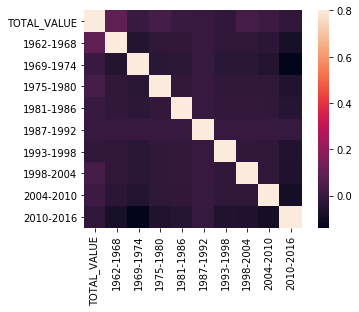

             TOTAL_VALUE  1962-1968  1969-1974  1975-1980  1981-1986  \
TOTAL_VALUE     1.000000   0.090806   0.002495   0.034550   0.003318   
1962-1968       0.090806   1.000000  -0.048713  -0.020272  -0.015675   
1969-1974       0.002495  -0.048713   1.000000  -0.035701  -0.027606   
1975-1980       0.034550  -0.020272  -0.035701   1.000000  -0.011488   
1981-1986       0.003318  -0.015675  -0.027606  -0.011488   1.000000   
1987-1992      -0.000188  -0.001665  -0.002932  -0.001220  -0.000944   
1993-1998      -0.015365  -0.019963  -0.035156  -0.014630  -0.011313   
1998-2004       0.033487  -0.020492  -0.036088  -0.015018  -0.011613   
2004-2010       0.014742  -0.030295  -0.053351  -0.022202  -0.017168   
2010-2016      -0.020725  -0.079011  -0.139146  -0.057906  -0.044776   

             1987-1992  1993-1998  1998-2004  2004-2010  2010-2016  
TOTAL_VALUE  -0.000188  -0.015365   0.033487   0.014742  -0.020725  
1962-1968    -0.001665  -0.019963  -0.020492  -0.030295  -0.079011  


In [173]:
#Next lets looks at the year the parcel was sold to so if the year ranges influence the total value
plotdf = df2.loc[:, ['TOTAL_VALUE']]
plotdf['1962-1968'] = features.iloc[:,0]
plotdf['1969-1974'] = features.iloc[:,1]
plotdf['1975-1980'] = features.iloc[:,2]
plotdf['1981-1986'] = features.iloc[:,3]
plotdf['1987-1992'] = features.iloc[:,4]
plotdf['1993-1998'] = features.iloc[:,5]
plotdf['1998-2004'] = features.iloc[:,6]
plotdf['2004-2010'] = features.iloc[:,7]
plotdf['2010-2016'] = features.iloc[:,8]
corrmat3 = plotdf.corr()
sns.heatmap(corrmat3, vmax=.8, square=True)
plt.show()
print(corrmat3)

#Looks like sale year does not have very much of an impact on total value for the parcel. However the largest correlation is a positive correlation from the earliest years. This means that older land parcels are slightly more valuble, likely because they are bigger. 

In [195]:
#Next let's see if zip code is a strong indicator of total value
features4 = pd.get_dummies(df2['SITUS_ZIP'])
plotdf =features4
plotdf['TOTAL_VALUE'] = df2['TOTAL_VALUE']
corrmat3 = plotdf.corr()
print(corrmat3)


                80012     80014     80022     80033     80123     80202  \
80012        1.000000 -0.000050 -0.000027 -0.000019 -0.001129 -0.001297   
80014       -0.000050  1.000000 -0.000027 -0.000019 -0.001129 -0.001297   
80022       -0.000027 -0.000027  1.000000 -0.000010 -0.000603 -0.000693   
80033       -0.000019 -0.000019 -0.000010  1.000000 -0.000427 -0.000490   
80123       -0.001129 -0.001129 -0.000603 -0.000427  1.000000 -0.029216   
80202       -0.001297 -0.001297 -0.000693 -0.000490 -0.029216  1.000000   
80203       -0.001238 -0.001238 -0.000662 -0.000468 -0.027889 -0.032043   
80204       -0.001355 -0.001355 -0.000724 -0.000512 -0.030513 -0.035058   
80205       -0.001554 -0.001554 -0.000831 -0.000587 -0.035002 -0.040216   
80206       -0.001403 -0.001403 -0.000750 -0.000530 -0.031608 -0.036317   
80207       -0.001347 -0.001347 -0.000720 -0.000509 -0.030333 -0.034852   
80209       -0.001556 -0.001556 -0.000832 -0.000588 -0.035056 -0.040279   
80210       -0.001892 -0.

None of the zip codes have a very strong influence on total value, but the highest correlation is at zip code 80265, which is the downtown area

After evaluating these features and variables, it is apprarant that sale price and size of improvements on the parcel are the largest drivers of total value. I think that lot size would be another driver of total value, but that information is not in the dataset. Since sale price and total value are similar, I would drop sale price and only evaluate improvement size and zoning district. 